In [1]:
from preprocessing import apply_OHE, init_OHE, feature_engineering, reduce_by_frequency_occurrence

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import numpy as np
import pandas as pd
import auxiliar as aux

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.metrics import roc_auc_score

<h1>Random Forest</h1>

<h3> Preprocesamiento 1: OHE<h3> 

In [2]:
X, y = aux.get_train_set()
X = feature_engineering(X)

In [3]:
init_OHE(X)
X_p1 = apply_OHE(X)
X_p1

,anios_estudiados,edad,ganancia_perdida_declarada_bolsa_argentina,horas_trabajo_registradas,barrio_almagro,barrio_balvanera,barrio_barracas,barrio_belgrano,barrio_boedo,barrio_caballito,...,trabajo_no_especificado,trabajo_otros,trabajo_profesional_especializado,trabajo_reparador,trabajo_sector_primario,trabajo_seguridad,trabajo_servicio_domestico,trabajo_soporte_tecnico,trabajo_transporte,trabajo_ventas
0,17,39,2174,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,50,0,13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,38,0,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,53,0,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,28,0,40,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,27,0,38,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,13,40,0,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,13,58,0,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,13,22,0,20,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_train_p1, X_test_p1, y_train_p1, y_test_p1 = train_test_split(
    X_p1, y, random_state=0, test_size=0.2, stratify=y
)

Cosas probadas con el Grid:

    * Entropia/Gini - MXD(10 a 31) -> Entropia, MXD = 15, score: 0.854/0.857
    * Entropia/Gini - MXD(10 a 31) - sqrt/log2 -> Entropia, MDX=15, sqrt, score: 0.8539
    * Entropia/Gini - MXD(12 A 19) - MSL(40 A 46) -> Entropia, MXD=16, MSL=40, score: 0.8483/0.8515
    * Entropia - MXD(13 A 18) - MSL(30 A 41) -> Entropia, MXD = 17, MSL = 30, score: 0.8515, 0.8547
    * Entropia/Gini - MXD(13 A 18) - sqrt/log2, estimadores(1 a 101 - 20) -> Entropia, MXD=15, sqrt, n_est=81, score: 0.8541
    * Entropia, MXD(1 a 11), MSL(40 a 61) -> Entropia, MXD = 10, MSL=41, score: 0.8455
    * Entropia, MXD(5 a 15), MSL(1,101, 10) -> Entropia, MXD=14, MSL=1, score: 0.8546
    * Entropia, MXD(5 a 21), n_est(1, 1001, 50) -> Entropia, MXD=10, n_est = 451, score: 0.8506
    * Entropia, MXD(5 a 16), n_Est(100, 501, 100) -> Entropia, MXD=15, n_est = 200, score = 0.8467
    
    Entropia, sqrt:
        MXD(5, 16):
            50 MSL (fijo), 200EST -> 0.9103 / 0.9046
            100MSL (fijo), 200EST -> 0.9067 / 0.9013
        MXD = 10 (Fijo):
            100 MSL (fijo), 200EST -> 0.9051 / 0.899

In [5]:
#'criterion': ['gini', 'entropy'], 'max_depth': np.arange(5, 6), 'min_samples_leaf': np.arange(35, 46), 'n_estimators': np.arange(1, 1001, 10), 'max_features': ['sqrt']

parameters = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(5, 11, 5), 'min_samples_leaf': np.arange(50, 151, 50), 'n_estimators': np.arange(100,301,100), 'max_features': ['sqrt', 'log2']}

clf = RandomForestClassifier(random_state = 0)

scv_p1 = RandomizedSearchCV(
    clf, parameters, n_iter=50, scoring='roc_auc', cv=5, return_train_score=True
).fit(X_train_p1, y_train_p1)

In [19]:
print(f"Best score: {scv_p1.best_score_}")
print(f"Best params {scv_p1.best_params_}")
print("------------------")
print(f"Score in Validation: {scv_p1.score(X_test_p1, y_test_p1)}")

Best score: 0.90430485972522
Best params {'n_estimators': 300, 'min_samples_leaf': 50, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
------------------
Score in Validation: 0.8977853325354409


In [20]:
rng_frt_p1 = scv_p1.best_estimator_
rng_frt_p1

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=50, n_estimators=300, random_state=0)

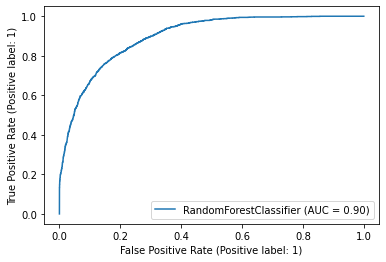

In [21]:
plot_roc_curve(rng_frt_p1, X_test_p1, y_test_p1, response_method="predict_proba")
plt.show()

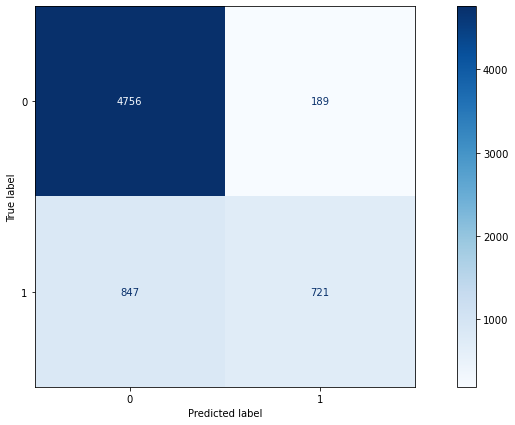

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    rng_frt_p1, X_test_p1, y_test_p1, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax
)
plt.show()

In [23]:
y_pred_p1 = rng_frt_p1.predict(X_test_p1)
print(classification_report(y_test_p1, y_pred_p1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4945
           1       0.79      0.46      0.58      1568

    accuracy                           0.84      6513
   macro avg       0.82      0.71      0.74      6513
weighted avg       0.84      0.84      0.82      6513



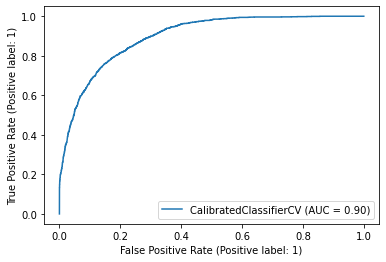

test score: 0.8472286196837095


In [24]:
calibrated_clf_p1 = CalibratedClassifierCV(base_estimator=rng_frt_p1, cv="prefit")
calibrated_clf_p1.fit(X_test_p1, y_test_p1)
plot_roc_curve(calibrated_clf_p1, X_test_p1, y_test_p1, response_method="predict_proba")
plt.show()
print(f"test score: {calibrated_clf_p1.score(X_test_p1, y_test_p1)}")

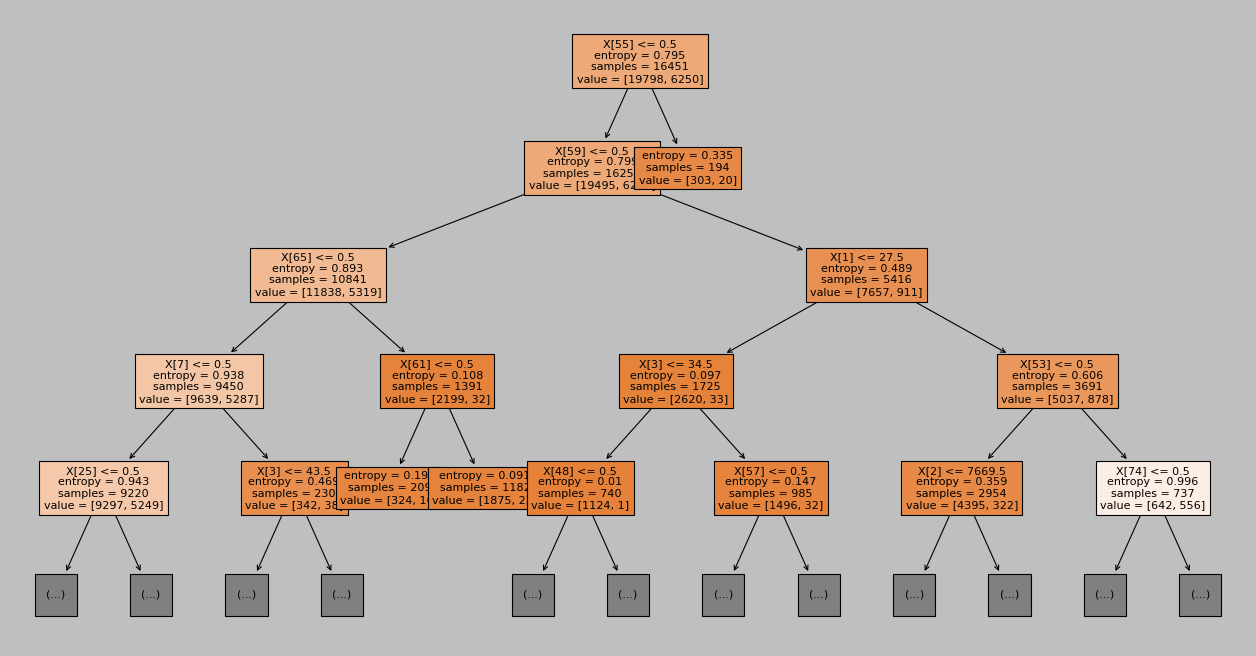

In [25]:
with plt.style.context("classic"):
    plt.figure(figsize=(20, 10))
    plot_tree(rng_frt_p1.estimators_[0], filled=True, fontsize=10, max_depth=4)
    #feature_names=list(X_train.columns)
    plt.savefig('tree_high_dpi', dpi=100)
    #class_names=["no alto V", "alto V"]

<h3> Preprocesamiento 2: OHE y Reducción de las columnas: Barrio, Religion, Categoria de Trabajo, Estado Marital </h3>

In [26]:
X_p2 = reduce_by_frequency_occurrence(X)

In [27]:
init_OHE(X_p2)
X_p2 = apply_OHE(X_p2)
X_p2

,anios_estudiados,edad,ganancia_perdida_declarada_bolsa_argentina,horas_trabajo_registradas,barrio_palermo,categoria_de_trabajo_relacion_de_dependencia,estado_marital_otro,estado_marital_sin_matrimonio,genero_mujer,religion_judaismo,...,trabajo_no_especificado,trabajo_otros,trabajo_profesional_especializado,trabajo_reparador,trabajo_sector_primario,trabajo_seguridad,trabajo_servicio_domestico,trabajo_soporte_tecnico,trabajo_transporte,trabajo_ventas
0,17,39,2174,40,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,50,0,13,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,38,0,40,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,53,0,40,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,28,0,40,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,27,0,38,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,13,40,0,40,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,13,58,0,40,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,13,22,0,20,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(
    X_p2, y, random_state=0, test_size=0.2, stratify=y
)

Cosas probadas con el Grid:

    * Entropia/Gini - MXD(10 a 31) -> Entropia, MXD = 15, score: 0.854/0.857
    * Entropia/Gini - MXD(10 a 31) - sqrt/log2 -> Entropia, MDX=15, sqrt, score: 0.8539
    * Entropia/Gini - MXD(12 A 19) - MSL(40 A 46) -> Entropia, MXD=16, MSL=40, score: 0.8483/0.8515
    * Entropia - MXD(13 A 18) - MSL(30 A 41) -> Entropia, MXD = 17, MSL = 30, score: 0.8515, 0.8547
    * Entropia/Gini - MXD(13 A 18) - sqrt/log2, estimadores(1 a 101 - 20) -> Entropia, MXD=15, sqrt, n_est=81, score: 0.8541
    * Entropia, MXD(1 a 11), MSL(40 a 61) -> Entropia, MXD = 10, MSL=41, score: 0.8455
    * Entropia, MXD(5 a 15), MSL(1,101, 10) -> Entropia, MXD=14, MSL=1, score: 0.8546
    * Entropia, MXD(5 a 21), n_est(1, 1001, 50) -> Entropia, MXD=10, n_est = 451, score: 0.8506
    * Entropia, MXD(5 a 16), n_Est(100, 501, 100) -> Entropia, MXD=15, n_est = 200, score = 0.8467
    
    Entropia, sqrt:
        MXD(5, 16):
            50 MSL (fijo), 200EST -> 0.9103 / 0.9046
            100MSL (fijo), 200EST -> 0.9067 / 0.9013
        MXD = 10 (Fijo):
            100 MSL (fijo), 200EST -> 0.9051 / 0.899

In [41]:
#'criterion': ['gini', 'entropy'], 'max_depth': np.arange(5, 6), 'min_samples_leaf': np.arange(35, 46), 'n_estimators': np.arange(1, 1001, 10), 'max_features': ['sqrt']

parameters = {'criterion': ['entropy'], 'max_depth': np.arange(5, 11, 5), 'min_samples_leaf': np.arange(40, 101, 10), 'n_estimators': np.arange(100,501,100)}

clf = RandomForestClassifier(random_state = 0)

scv_p2 = GridSearchCV(
    clf, parameters, scoring='roc_auc', cv=5, return_train_score=True
).fit(X_train_p2, y_train_p2)

In [49]:
print(f"Best score: {scv_p2.best_score_}")
print(f"Best params {scv_p2.best_params_}")
print("------------------")
print(f"Score in Validation: {scv_p2.score(X_test_p2, y_test_p2)}")

Best score: 0.9084750069942045
Best params {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 40, 'n_estimators': 400}
------------------
Score in Validation: 0.9031286111512351


In [50]:
rng_frt_p2 = scv_p2.best_estimator_
rng_frt_p2

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=40,
                       n_estimators=400, random_state=0)

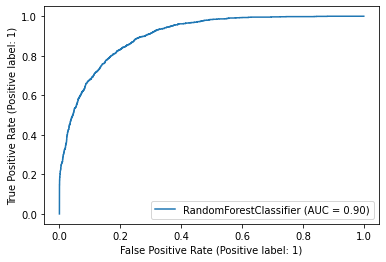

In [51]:
plot_roc_curve(rng_frt_p2, X_test_p2, y_test_p2, response_method="predict_proba")
plt.show()

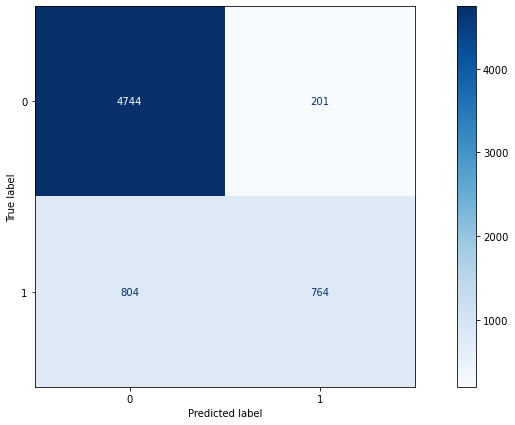

In [52]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    rng_frt_p2, X_test_p2, y_test_p2, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax
)
plt.show()

In [46]:
y_pred_p2 = rng_frt_p2.predict(X_test_p2)
print(classification_report(y_test_p2, y_pred_p2))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      4945
           1       0.79      0.49      0.60      1568

    accuracy                           0.85      6513
   macro avg       0.82      0.72      0.75      6513
weighted avg       0.84      0.85      0.83      6513



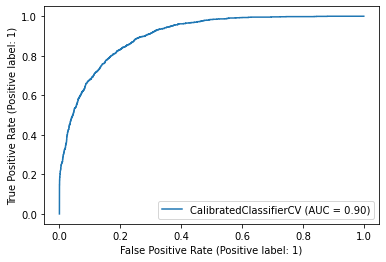

test score: 0.8493781667434362


In [47]:
calibrated_clf_p2 = CalibratedClassifierCV(base_estimator=rng_frt_p2, cv="prefit")
calibrated_clf_p2.fit(X_test_p2, y_test_p2)
plot_roc_curve(calibrated_clf_p2, X_test_p2, y_test_p2, response_method="predict_proba")
plt.show()
print(f"test score: {calibrated_clf_p2.score(X_test_p2, y_test_p2)}")

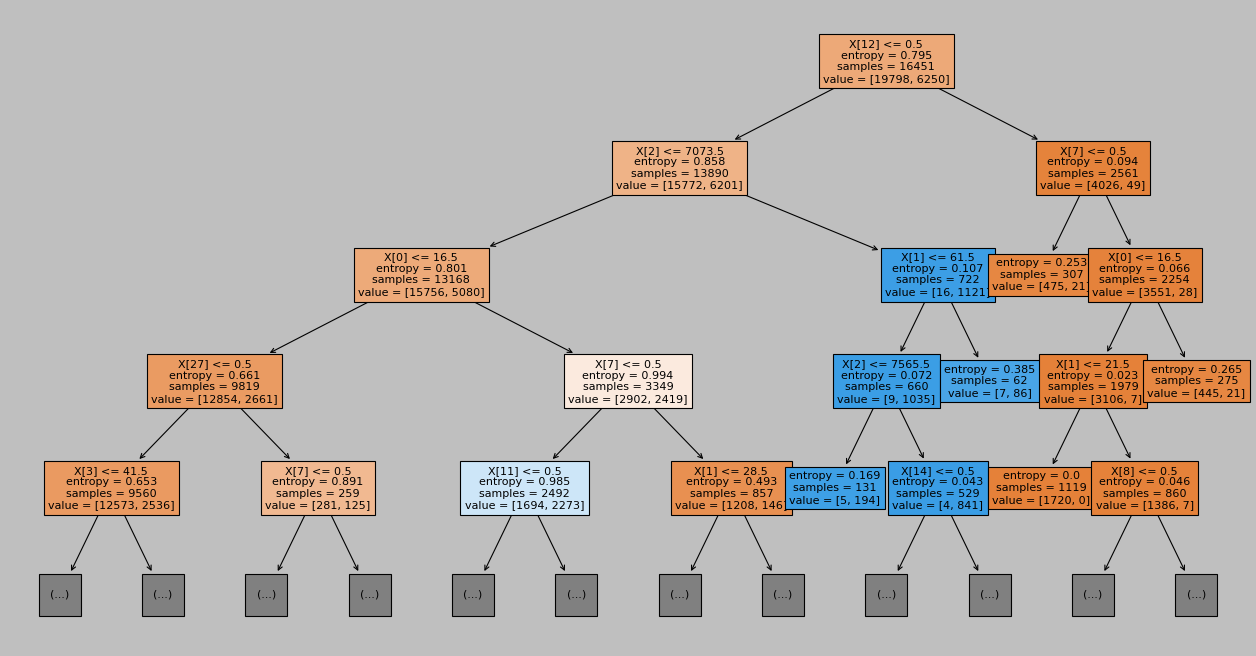

In [48]:
with plt.style.context("classic"):
    plt.figure(figsize=(20, 10))
    plot_tree(rng_frt_p2.estimators_[0], filled=True, fontsize=10, max_depth=4)
    #feature_names=list(X_train.columns)
    plt.savefig('tree_high_dpi', dpi=100)
    #class_names=["no alto V", "alto V"]